In [41]:
import numpy as np

class SVM:
    def __init__(self, lr=0.001, epoch=1000, lmbd=0.01):
        self.lr = lr
        self.epoch = epoch
        self.lmbd = lmbd
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        
        # convertir en y valores de 0 a -1
        y = np.where(y == 0, -1, 1)
        
        self.weights = np.zeros((n, 1))
        self.bias = 0

        for epoch in range(self.epoch):
            for i in range(m):
                xi = X[i].reshape(1, -1)
                #Hinge loss condition
                if y[i] * (np.dot(xi, self.weights) + self.bias) >= 1:
                    #Fuera del margen
                    dw = 2 * self.lmbd * self.weights
                    db = 0
                else:
                    #Dentro del margen
                    dw = 2 * self.lmbd * self.weights - y[i] * xi.T
                    db = -y[i]

                self.weights = self.weights - self.lr * dw
                self.bias = self.bias - self.lr * db

    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        return np.where(linear >= 0, 1, 0)

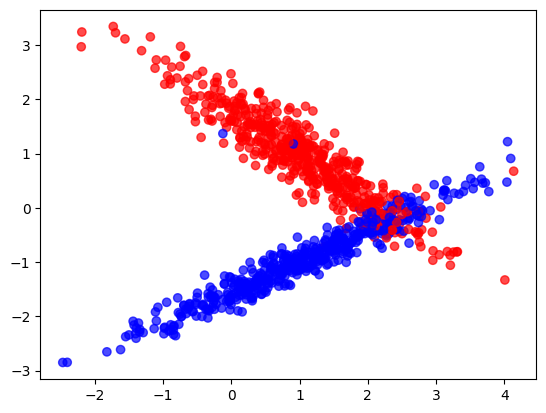

performance accuracy: 0.91


In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


X, y = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", alpha=0.7)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVM(lr=0.001, epoch=1000, lmbd=0.01)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("performance accuracy:", accuracy_score(y_test, pred))

A Diferencia de la regresión logística, Super Vector Machine Utliza una margen que se ajusta para clasificar en vez de utilizar un límite, siendo que este permite trabajar mejor con rangos numéricos y no categóricos, este dando un resultado directo en vez de una probabilidad. Este ademas utiliza hinge loss como función de pérdida a diferencia de la regresión logística que utiliza log loss.